# Red Wine Quality Classification - Optimized Models


**Bugra Sebati E.** - **August 2021**

## Introduction
This datasets is related to red variants of the Portuguese “Vinho Verde” wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.)

**What you can find on this notebook?**
* Understanding the data
* Exploratory Data Analysis
* Normal distribution control
* Unbalanced Data problem
* Classification Models
* Classification Models Optimization
* Model Select

**Information about Red Wine :**

Starting with the basics, red wine is an alcoholic beverage made by fermenting the juice of dark-skinned grapes. Red wine differs from white wine in its base material and production process. Red wine is made with dark-skinned rather than light-skinned grapes. During red wine production, the winemaker allows pressed grape juice, called must, to macerate and ferment with the dark grape skins, which adds color, flavor and tannin to the wine. Alcohol occurs when yeast converts grape sugar into ethanol and carbon dioxide. The result of these processes: Red wine.

References : www.winemag.com


![](http://media0.giphy.com/media/RNDV3Y4K0g19YY5EWd/giphy.gif)

**What are our variables? Let's meet**

* **Fixed acidity** :  Most acids involved with wine or fixed or nonvolatile.(do not evaporate readily)
* **Volatile acidity** : The amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste.
* **Citric acid** :  Found in small quantities, citric acid can add 'freshness' and flavor to wines.
* **Residual sugar** :  The amount of sugar remaining after fermentation stops, it’s rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet.
* **Chlorides** :  The amount of salt in the wine.
* **Free sulfur dioxide** :  The free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine.
* **Total sulfur dioxide** :  Amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine.
* **Density** :  The density of water is close to that of water depending on the percent alcohol and sugar content.
* **pH** :  Describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale.
* **Sulphates** :  A wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant
* **Alcohol** :  The percent alcohol content of the wine.

**Target Variable : Quality** : Based on sensory data, score between 3 and 8


**If you like this notebook,dont forget to upvote :) Thanks !**

**We are ready to start. Cheers !**

In [1]:
#### IMPORT LIBRARIES


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split , GridSearchCV , cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
redwine = pd.read_csv("../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")
df = redwine.copy()
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


Any missing values in dataset?

In [5]:
df.isnull().values.any()

False

Now, let's look at the distribution of the target variable

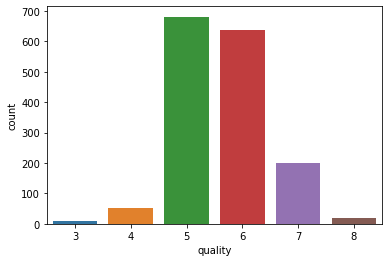

In [6]:
sns.countplot(x = "quality" , data = df);

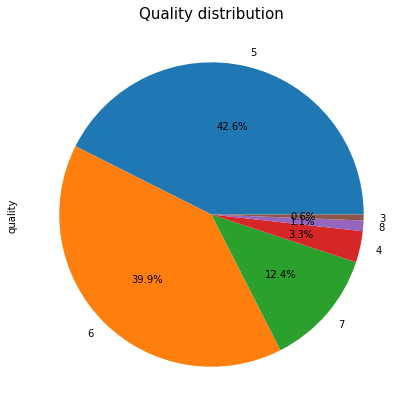

In [7]:
plt.figure(1, figsize = (12,7))
plt.title("Quality distribution", color = "black", fontsize = 15)
df["quality"].value_counts().plot.pie(autopct = "%1.1f%%");

Let's analyze the correlation

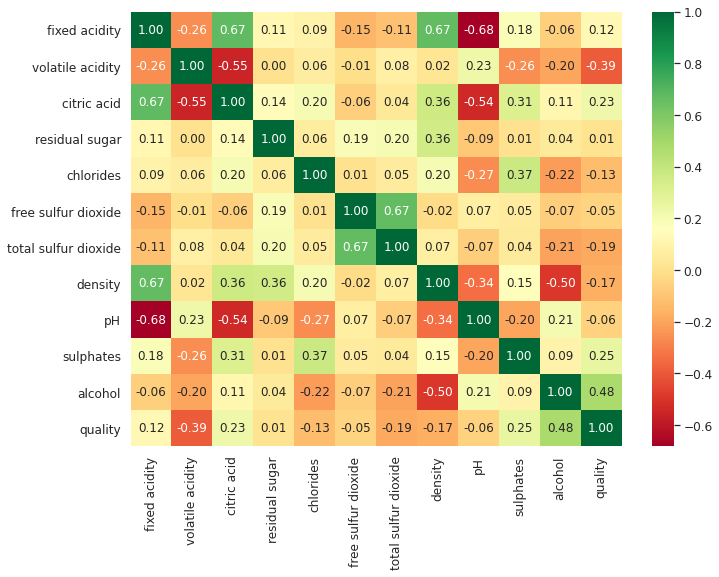

In [8]:
plt.figure(figsize = (11,8))
sns.set(font_scale = 1.1)
sns.heatmap(df.corr() , cmap = "RdYlGn", annot = True, fmt = ".2f", annot_kws = {"size": 12});

Highest **positive** correlation : alcohol (0.48) **Moderate degree**

Highest **negative** correlation : volatile acidity(-0.39) **Moderate degree**

Now, we will look at the distribution and skewness and kurtosis value of all variables.

We will test the normality distribution with the Shapiro-Wilk test.

#### **Shapiro-Wilk Test :**
Tests whether a data sample has a Normal distribution.

**Assumption** : Observations in each sample are independent and distributed identically.

**Hypothesis** : 

**H0**: the sample has a Normal distribution.

**H1**: the sample does not have a Normal distribution.

If pvalue is less than 0.05, there is no normal distribution

#### Fixed acidity

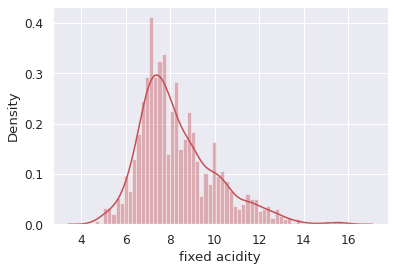

In [9]:
sns.distplot(df["fixed acidity"] , color = "r", bins = 60 , hist_kws = {"alpha": 0.4});

In [10]:
print("Skewness: %f" % df["fixed acidity"].skew())
print("Kurtosis: %f" % df["fixed acidity"].kurt())
test_statistic, pvalue = shapiro(df["fixed acidity"])
print('Shapiro Test Statistic = %.4f, p-value = %.4f' % (test_statistic, pvalue))

Skewness: 0.982751
Kurtosis: 1.132143
Shapiro Test Statistic = 0.9420, p-value = 0.0000


#### Volatile acidity

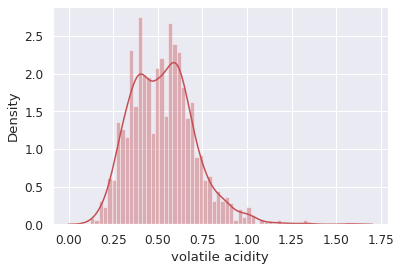

In [11]:
sns.distplot(df["volatile acidity"] , color = "r", bins = 60 , hist_kws = {"alpha": 0.4});

In [12]:
print("Skewness: %f" % df["volatile acidity"].skew())
print("Kurtosis: %f" % df["volatile acidity"].kurt())
test_statistic, pvalue = shapiro(df["volatile acidity"])
print('Shapiro Test Statistic = %.4f, p-value = %.4f' % (test_statistic, pvalue))

Skewness: 0.671593
Kurtosis: 1.225542
Shapiro Test Statistic = 0.9743, p-value = 0.0000


#### Citric acid

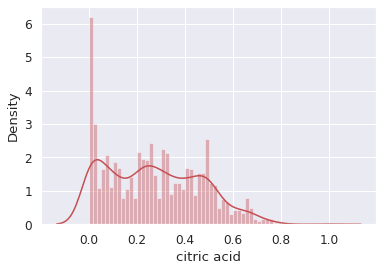

In [13]:
sns.distplot(df["citric acid"] , color = "r", bins = 60 , hist_kws = {"alpha": 0.4});

In [14]:
print("Skewness: %f" % df["citric acid"].skew())
print("Kurtosis: %f" % df["citric acid"].kurt())
test_statistic, pvalue = shapiro(df["citric acid"])
print('Shapiro Test Statistic = %.4f, p-value = %.4f' % (test_statistic, pvalue))

Skewness: 0.318337
Kurtosis: -0.788998
Shapiro Test Statistic = 0.9553, p-value = 0.0000


#### Residual sugar

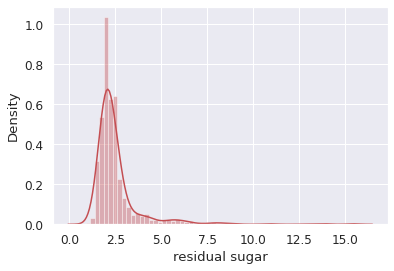

In [15]:
sns.distplot(df["residual sugar"] , color = "r", bins = 60 , hist_kws = {"alpha": 0.4});

In [16]:
print("Skewness: %f" % df["residual sugar"].skew())
print("Kurtosis: %f" % df["residual sugar"].kurt())
test_statistic, pvalue = shapiro(df["residual sugar"])
print('Shapiro Test Statistic = %.4f, p-value = %.4f' % (test_statistic, pvalue))

Skewness: 4.540655
Kurtosis: 28.617595
Shapiro Test Statistic = 0.5661, p-value = 0.0000


#### Chlorides

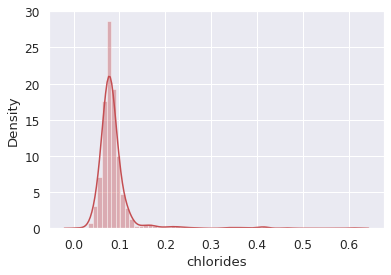

In [17]:
sns.distplot(df["chlorides"] , color = "r", bins = 60 , hist_kws = {"alpha": 0.4});

In [18]:
print("Skewness: %f" % df["chlorides"].skew())
print("Kurtosis: %f" % df["chlorides"].kurt())
test_statistic, pvalue = shapiro(df["chlorides"])
print('Shapiro Test Statistic = %.4f, p-value = %.4f' % (test_statistic, pvalue))

Skewness: 5.680347
Kurtosis: 41.715787
Shapiro Test Statistic = 0.4842, p-value = 0.0000


#### Free sulfur dioxide

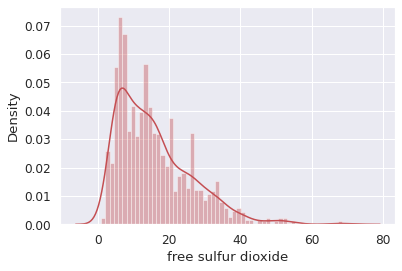

In [19]:
sns.distplot(df["free sulfur dioxide"] , color = "r", bins = 60 , hist_kws = {"alpha": 0.4});

In [20]:
print("Skewness: %f" % df["free sulfur dioxide"].skew())
print("Kurtosis: %f" % df["free sulfur dioxide"].kurt())
test_statistic, pvalue = shapiro(df["free sulfur dioxide"])
print("Shapiro Test Statistic = %.4f, p-value = %.4f" % (test_statistic, pvalue))

Skewness: 1.250567
Kurtosis: 2.023562
Shapiro Test Statistic = 0.9018, p-value = 0.0000


#### Total sulfur dioxide

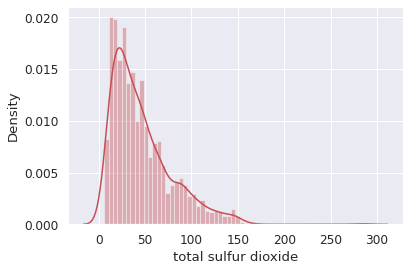

In [21]:
sns.distplot(df["total sulfur dioxide"] , color = "r" , bins = 60 , hist_kws = {"alpha" : 0.4});

In [22]:
print("Skewness: %f" % df["total sulfur dioxide"].skew())
print("Kurtosis: %f" % df["total sulfur dioxide"].kurt())
test_statistic , pvalue = shapiro(df["total sulfur dioxide"])
print("Shapiro Test Statistic = %.4f, p-value = %.4f" % (test_statistic , pvalue))

Skewness: 1.515531
Kurtosis: 3.809824
Shapiro Test Statistic = 0.8732, p-value = 0.0000


#### Density

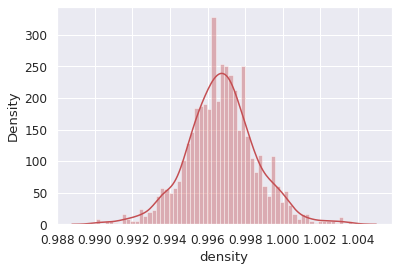

In [23]:
sns.distplot(df["density"] , color = "r" , bins = 60 , hist_kws = {"alpha" : 0.4});

In [24]:
print("Skewness: %f" % df["density"].skew())
print("Kurtosis: %f" % df["density"].kurt())
test_statistic, pvalue = shapiro(df["density"])
print("Shapiro Test Statistic = %.4f, pvalue = %.4f" % (test_statistic , pvalue))

Skewness: 0.071288
Kurtosis: 0.934079
Shapiro Test Statistic = 0.9909, pvalue = 0.0000


#### pH

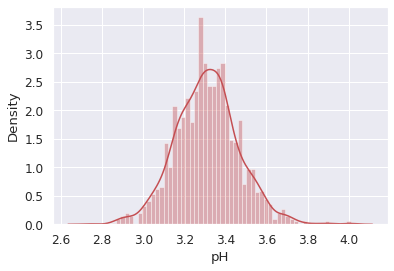

In [25]:
sns.distplot(df["pH"], color = "r" , bins = 60 , hist_kws = {"alpha" : 0.4});

In [26]:
print("Skewness : %f" % df["pH"].skew())
print("Kurtosis : %f" % df["pH"].kurt())
test_statistic , pvalue = shapiro(df["pH"])
print("Shapiro Test Statistic : %.4f, pvalue = %.4f" % (test_statistic , pvalue))

Skewness : 0.193683
Kurtosis : 0.806943
Shapiro Test Statistic : 0.9935, pvalue = 0.0000


#### Sulphates

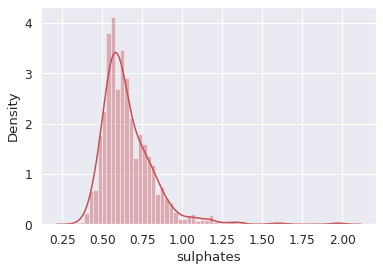

In [27]:
sns.distplot(df["sulphates"] , color = "r" , bins = 60 , hist_kws = {"alpha" : 0.4});

In [28]:
print("Skewness : %f" % df["sulphates"].skew())
print("Kurtosis : %f" % df["sulphates"].kurt())
test_statistic , pvalue = shapiro(df["sulphates"])
print("Shapiro Test Statistic : %.4f , pvalue : %.4f" % (test_statistic , pvalue))

Skewness : 2.428672
Kurtosis : 11.720251
Shapiro Test Statistic : 0.8330 , pvalue : 0.0000


#### Alcohol

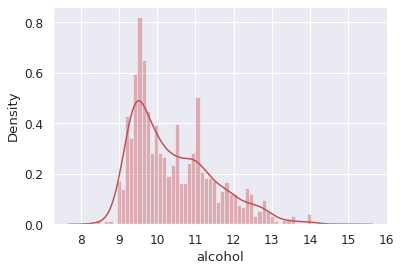

In [29]:
sns.distplot(df["alcohol"] , color = "r" , bins = 60 , hist_kws = {"alpha" : 0.4});

In [30]:
print("Skewness : %f" % df["alcohol"].skew())
print("Kurtosis : %f" % df["alcohol"].kurt())
test_statistic , pvalue = shapiro(df["alcohol"])
print("Shapiro Test Statistic : %.4f , pvalue : %.4f" % (test_statistic , pvalue))

Skewness : 0.860829
Kurtosis : 0.200029
Shapiro Test Statistic : 0.9288 , pvalue : 0.0000


Let's look at the distribution of variables with the target variable using the boxplot graph.

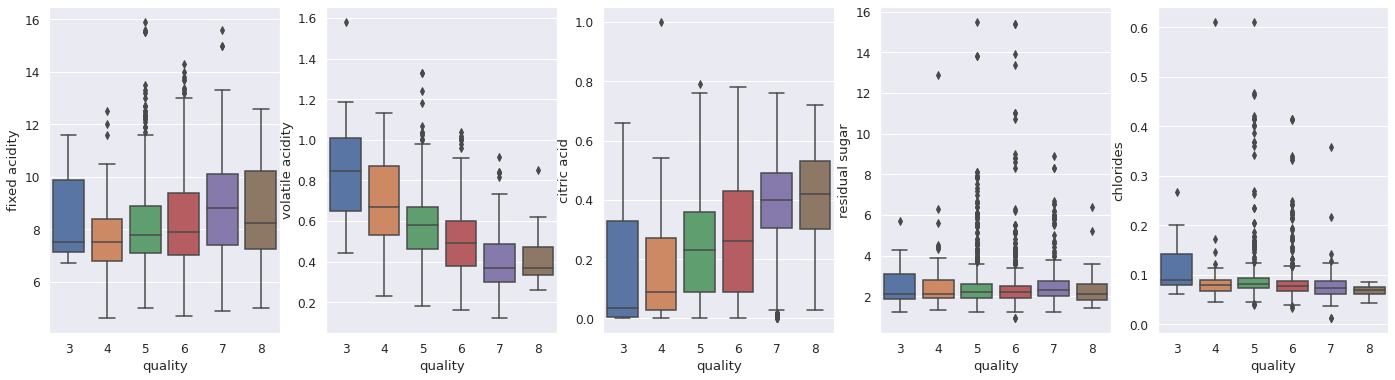

In [31]:
figure, ax = plt.subplots(1,5, figsize = (24,6))
sns.boxplot(data = df, x = "quality", y="fixed acidity", ax = ax[0])
sns.boxplot(data = df, x = "quality", y="volatile acidity", ax = ax[1])
sns.boxplot(data = df, x = "quality", y="citric acid", ax = ax[2])
sns.boxplot(data = df, x = "quality", y="residual sugar", ax = ax[3])
sns.boxplot(data = df, x = "quality", y="chlorides", ax = ax[4])
plt.show()

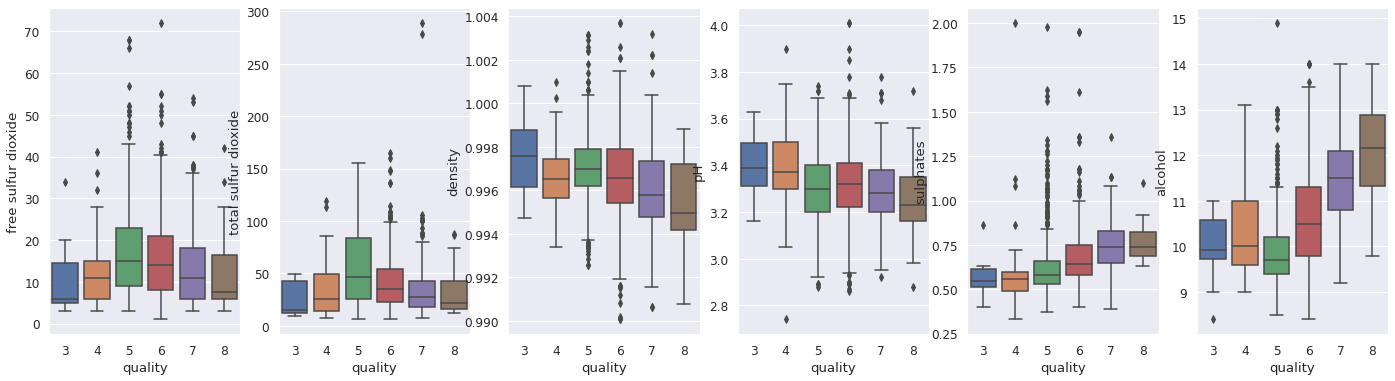

In [32]:
figure, ax = plt.subplots(1,6, figsize = (24,6))
sns.boxplot(data = df, x = "quality", y="free sulfur dioxide", ax = ax[0])
sns.boxplot(data = df, x = "quality", y="total sulfur dioxide", ax = ax[1])
sns.boxplot(data = df, x = "quality", y="density", ax = ax[2])
sns.boxplot(data = df, x = "quality", y="pH", ax = ax[3])
sns.boxplot(data = df, x = "quality", y="sulphates", ax = ax[4])
sns.boxplot(data = df, x = "quality", y="alcohol", ax = ax[5])
plt.show()

Now, we need a function that will help us with the modeling.

The quality variable is 6 categories, we'll transform it to 2. ( 0 and 1 )

In [33]:
df["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [34]:
## transform func.

df["quality"] = df["quality"].apply(lambda value : 1 if value >= 7 else 0)

In [35]:
df["quality"].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [36]:
x = df[df.columns[:-1]]
y = df["quality"]

We need to standardize our independent variables. 

In [37]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [38]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.20 , random_state = 42)

In [39]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((1279, 11), (320, 11), (1279,), (320,))

I think we're ready, but we have a problem. Unbalanced data !

#### **Unbalanced Data Problem**
Unbalanced data refers to classification problems where we have unequal instances for different classes. Having unbalanced data is actually very common in general, but it is especially prevalent when working with disease data where we usually have more healthy control samples than disease cases. Even more extreme unbalance is seen with fraud detection, where e.g. most credit card uses are okay and only very few will be fraudulent.

Most machine learning classification algorithms are sensitive to unbalance in the predictor classes. Let’s consider an even more extreme example than our red wine dataset: assume we had 10 good quality vs 90 bad quality samples. A machine learning model that has been trained and tested on such a dataset could now predict “bad quality” for all samples and still gain a very high accuracy. An unbalanced dataset will bias the prediction model towards the more common class!

**Solutions**

* **Find extra data**  : The number of observations in a class with few observations can be increased.
* **Undersampling**   : Undersampling refers to a group of techniques designed to balance the class distribution for a classification dataset that has a skewed class distribution.
* **Oversampling**    : I think undersampling should be preferred if it can't be done.It's very likely to cause overfit.
* **Resampling : SMOTE**  : It does not act as a classic data copy. Copying data does not give new information to the model.It uses KNN algorithm. It selects random data from a minority category selects their neighbors, and generates data. This process repeats until the majority reaches the number of observations in the category. 

**I used SMOTE in this notebook. You can also find different methods for the unbalanced data problem.**

In [40]:
smote = SMOTE(k_neighbors = 4 , random_state = 12)
x_train, y_train = smote.fit_resample(x_train, y_train)
y_train.value_counts()

0    1109
1    1109
Name: quality, dtype: int64

#### READY FOR ML !

![](http://media4.giphy.com/media/8Iv5lqKwKsZ2g/giphy.gif)

#### KNN Classifier (K-Nearest Neighbors Algorithm)

In [41]:
knn = KNeighborsClassifier()
knn_model = knn.fit(x_train , y_train)

In [42]:
y_pred_knn = knn_model.predict(x_test)
accuracy_score(y_test , y_pred_knn)

0.78125

#### OPTIMIZATION

In [43]:
knn_params = {"n_neighbors": np.arange(1,60)}
knn_cv = GridSearchCV(knn , knn_params, cv = 10)
knn_cv.fit(x_train , y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59])})

In [44]:
print("Best Parameters: " + str(knn_cv.best_params_))

Best Parameters: {'n_neighbors': 2}


**Optimized Model**

In [45]:
knn = KNeighborsClassifier(n_neighbors = 2)
opt_knn = knn.fit(x_train , y_train)

In [46]:
y_pred_knn = opt_knn.predict(x_test)
accuracy_score(y_test , y_pred_knn)

0.878125

In [47]:
print(classification_report(y_test , y_pred_knn))

              precision    recall  f1-score   support

           0       0.95      0.90      0.93       273
           1       0.57      0.72      0.64        47

    accuracy                           0.88       320
   macro avg       0.76      0.81      0.78       320
weighted avg       0.89      0.88      0.88       320



So, what is this table ? Let's explain.

For all models, you can evaluate it this way.

![](http://www.linkpicture.com/q/Sunu1_3.jpg)

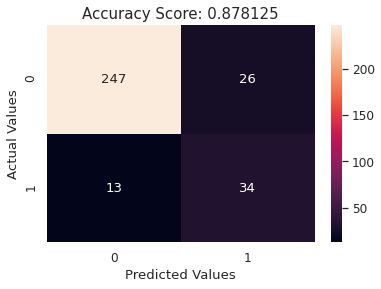

In [48]:
score = round(accuracy_score(y_test, y_pred_knn), 6)
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot = True, fmt = ".0f")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Accuracy Score: {0}".format(score), size = 15)
plt.show()

#### Logistic Regression

In [49]:
logi = LogisticRegression(solver = "liblinear")
log_model = logi.fit(x_train,y_train)

In [50]:
log_model.predict_proba(x_test)[:5]

array([[0.9175195 , 0.0824805 ],
       [0.97295502, 0.02704498],
       [0.65680933, 0.34319067],
       [0.89788912, 0.10211088],
       [0.71828488, 0.28171512]])

In [51]:
y_pred_logi = log_model.predict(x_test)
accuracy_score(y_test, y_pred_logi)

0.803125

In [52]:
cross_val_score(log_model, x_test, y_test, cv = 10).mean()

0.85625

In [53]:
print(classification_report(y_test , y_pred_logi))

              precision    recall  f1-score   support

           0       0.98      0.79      0.87       273
           1       0.42      0.89      0.57        47

    accuracy                           0.80       320
   macro avg       0.70      0.84      0.72       320
weighted avg       0.90      0.80      0.83       320



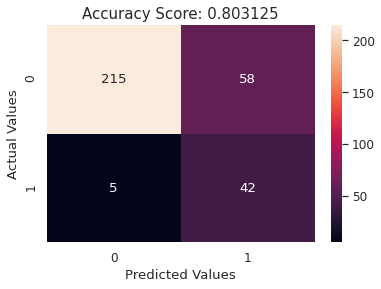

In [54]:
score = round(accuracy_score(y_test, y_pred_logi), 6)
cm = confusion_matrix(y_test, y_pred_logi)
sns.heatmap(cm, annot = True, fmt = ".0f")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Accuracy Score: {0}".format(score), size = 15)
plt.show()

#### GBM (Gradient Boosting Machine)

In [55]:
gbm = GradientBoostingClassifier()
gbm_model = gbm.fit(x_train, y_train)

In [56]:
y_pred_gbm = gbm_model.predict(x_test)
accuracy_score(y_test, y_pred_gbm)

0.88125

#### OPTIMIZATION

In [57]:
#gbm_params = {"learning_rate" : [0.001, 0.01, 0.1, 0.05],
#             "n_estimators": [100,200,300,400,500,600,700],
#             "max_depth": [3,5,10],
#             "min_samples_split": [2,5,10]}

#gbm_cv = GridSearchCV(gbm , gbm_params , cv = 10 , n_jobs = -1 , verbose = 2)

#gbm_cv.fit(x_train, y_train)

In [58]:
#print("Best Parameters: " + str(gbm_cv.best_params_))

**Optimized Model**

In [59]:
gbm = GradientBoostingClassifier(learning_rate = 0.1, max_depth = 10 , min_samples_split = 5, n_estimators = 300)
opt_gbm = gbm.fit(x_train, y_train)

In [60]:
y_pred_gbm = opt_gbm.predict(x_test)
accuracy_score(y_test, y_pred_gbm)

0.896875

In [61]:
print(classification_report(y_test , y_pred_gbm))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       273
           1       0.65      0.66      0.65        47

    accuracy                           0.90       320
   macro avg       0.79      0.80      0.80       320
weighted avg       0.90      0.90      0.90       320



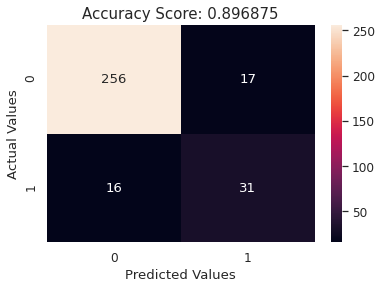

In [62]:
score = round(accuracy_score(y_test, y_pred_gbm), 6)
cm = confusion_matrix(y_test, y_pred_gbm)
sns.heatmap(cm, annot = True, fmt = ".0f")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Accuracy Score: {0}".format(score), size = 15)
plt.show()

#### Naive Bayes

In [63]:
nb = GaussianNB()
nb_model = nb.fit(x_train , y_train)

In [64]:
nb_model.predict_proba(x_test)[:5]

array([[0.96931896, 0.03068104],
       [0.9956919 , 0.0043081 ],
       [0.90722603, 0.09277397],
       [0.9351253 , 0.0648747 ],
       [0.37097196, 0.62902804]])

In [65]:
y_pred_nb = nb_model.predict(x_test)
accuracy_score(y_test , y_pred_nb)

0.728125

In [66]:
cross_val_score(nb_model, x_test, y_test, cv = 10).mean()

0.84375

In [67]:
print(classification_report(y_test , y_pred_nb))

              precision    recall  f1-score   support

           0       0.97      0.70      0.82       273
           1       0.34      0.87      0.49        47

    accuracy                           0.73       320
   macro avg       0.65      0.79      0.65       320
weighted avg       0.88      0.73      0.77       320



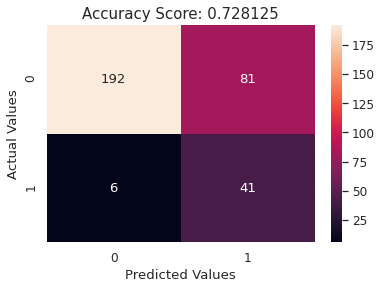

In [68]:
score = round(accuracy_score(y_test, y_pred_nb), 6)
cm = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm, annot = True, fmt = ".0f")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Accuracy Score: {0}".format(score), size = 15)
plt.show()

#### SVC (Support Vector Classifier)

In [69]:
svc = SVC()
svc_model = svc.fit(x_train , y_train)

In [70]:
y_pred_svc = svc_model.predict(x_test)
accuracy_score(y_test , y_pred_svc)

0.871875

#### OPTIMIZATION

In [71]:
svc_params = { "C" : [0.01 , 0.1 , 1 , 2 , 3 , 5 , 7 , 10],
             "gamma" : [0.01 , 0.1 , 1 , 3 , 5 , 7 , 10]}

svc_cv_model = GridSearchCV(svc,svc_params, 
                            cv = 10, 
                            n_jobs = -1, 
                            verbose = 2)

svc_cv_model.fit(x_train, y_train)

Fitting 10 folds for each of 56 candidates, totalling 560 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   28.1s
[Parallel(n_jobs=-1)]: Done 560 out of 560 | elapsed:   43.4s finished


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 2, 3, 5, 7, 10],
                         'gamma': [0.01, 0.1, 1, 3, 5, 7, 10]},
             verbose=2)

In [72]:
print("Best Parameters: " + str(svc_cv_model.best_params_))

Best Parameters: {'C': 2, 'gamma': 1}


**Optimized Model**

In [73]:
opt_svc = SVC(C = 2 , gamma = 1).fit(x_train, y_train)

In [74]:
y_pred_svc = opt_svc.predict(x_test)
accuracy_score(y_test, y_pred_svc)

0.909375

In [75]:
print(classification_report(y_test , y_pred_svc))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       273
           1       0.78      0.53      0.63        47

    accuracy                           0.91       320
   macro avg       0.85      0.75      0.79       320
weighted avg       0.90      0.91      0.90       320



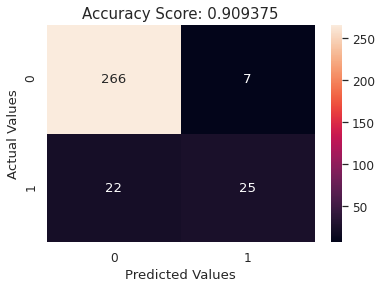

In [76]:
score = round(accuracy_score(y_test, y_pred_svc), 6)
cm = confusion_matrix(y_test, y_pred_svc)
sns.heatmap(cm, annot = True, fmt = ".0f")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Accuracy Score: {0}".format(score), size = 15)
plt.show()

#### MLP Classifier (Multi-Layer Perceptron Classifier)

In [77]:
mlpc = MLPClassifier()
mlpc_model = mlpc.fit(x_train , y_train)

In [78]:
y_pred_mlpc = mlpc.predict(x_test)
accuracy_score(y_test, y_pred_mlpc)

0.8625

#### OPTIMIZATION

In [79]:
#mlpc_params = {"alpha": [0.1, 0.01, 0.02, 0.005, 0.0001],
#              "hidden_layer_sizes": [(10,10,10),(100,100,100),(100,100),(10,10),(100,)],
#              "solver" : ["lbfgs","adam","sgd"],
#              "activation": ["relu","logistic"]}

#mlpc_cv_model = GridSearchCV(mlpc , mlpc_params , cv = 10 , n_jobs = -1 , verbose = 2)

#mlpc_cv_model.fit(x_train , y_train)

In [80]:
#print("Best Parameters: " + str(mlpc_cv_model.best_params_))

**Optimized Model**

In [81]:
mlpc = MLPClassifier(activation = "relu" , alpha = 0.01,
                     hidden_layer_sizes = (100, 100, 100) , solver = "adam")
opt_mlpc = mlpc.fit(x_train , y_train)

In [82]:
y_pred_mlpc = opt_mlpc.predict(x_test)
accuracy_score(y_test, y_pred_mlpc)

0.89375

In [83]:
print(classification_report(y_test , y_pred_mlpc))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94       273
           1       0.62      0.72      0.67        47

    accuracy                           0.89       320
   macro avg       0.78      0.82      0.80       320
weighted avg       0.90      0.89      0.90       320



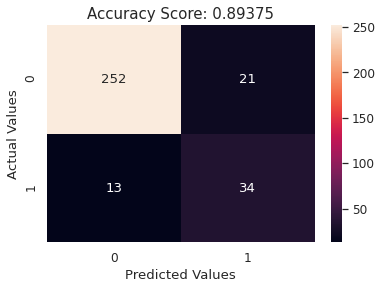

In [84]:
score = round(accuracy_score(y_test, y_pred_mlpc), 6)
cm = confusion_matrix(y_test, y_pred_mlpc)
sns.heatmap(cm, annot = True, fmt = ".0f")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Accuracy Score: {0}".format(score), size = 15)
plt.show()

#### Desicion Tree Classifier

In [85]:
clf = DecisionTreeClassifier()
clf_model = clf.fit(x_train , y_train)

In [86]:
y_pred_clf = clf_model.predict(x_test)
accuracy_score(y_test , y_pred_clf)

0.84375

In [87]:
print(classification_report(y_test , y_pred_clf))

              precision    recall  f1-score   support

           0       0.93      0.88      0.91       273
           1       0.48      0.64      0.55        47

    accuracy                           0.84       320
   macro avg       0.71      0.76      0.73       320
weighted avg       0.87      0.84      0.85       320



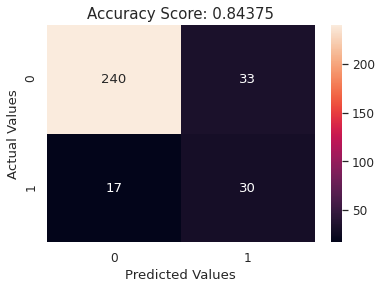

In [88]:
score = round(accuracy_score(y_test, y_pred_clf), 6)
cm = confusion_matrix(y_test, y_pred_clf)
sns.heatmap(cm, annot = True, fmt = ".0f")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Accuracy Score: {0}".format(score), size = 15)
plt.show()

#### Light GBM Classifier

In [89]:
lgbm = LGBMClassifier()
lgbm_model = lgbm.fit(x_train, y_train)

In [90]:
y_pred_lgbm = lgbm_model.predict(x_test)
accuracy_score(y_test, y_pred_lgbm)

0.90625

#### OPTIMIZATION

In [91]:
lgbm_params = {"n_estimators": [100 , 500 , 1000],
               "subsample": [0.6 , 0.8 , 1.0],
               "learning_rate": [0.1 , 0.01 , 0.02 , 0.05],
               "min_child_samples": [5 , 10 , 20]}

lgbm_cv_model = GridSearchCV(lgbm , lgbm_params , cv = 10 , n_jobs = -1 , verbose = 2)

lgbm_cv_model.fit(x_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   42.7s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  7.3min finished


GridSearchCV(cv=10, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.02, 0.05],
                         'min_child_samples': [5, 10, 20],
                         'n_estimators': [100, 500, 1000],
                         'subsample': [0.6, 0.8, 1.0]},
             verbose=2)

In [92]:
print("Best Parameters: " + str(lgbm_cv_model.best_params_))

Best Parameters: {'learning_rate': 0.1, 'min_child_samples': 10, 'n_estimators': 500, 'subsample': 0.6}


**Optimized Model**

In [93]:
lgbm = LGBMClassifier(learning_rate = 0.1 ,max_depth = 8 , min_child_samples = 10 , 
                      n_estimators = 500 , subsample = 0.6)

opt_lgbm = lgbm.fit(x_train, y_train)

In [94]:
y_pred_lgbm = opt_lgbm.predict(x_test)
accuracy_score(y_test, y_pred_lgbm)

0.909375

In [95]:
print(classification_report(y_test , y_pred_lgbm))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       273
           1       0.67      0.74      0.71        47

    accuracy                           0.91       320
   macro avg       0.81      0.84      0.83       320
weighted avg       0.91      0.91      0.91       320



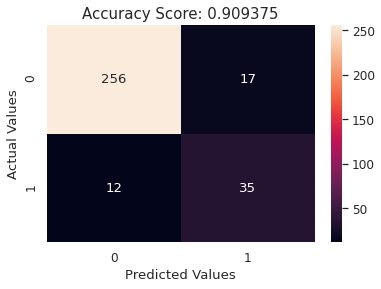

In [96]:
score = round(accuracy_score(y_test, y_pred_lgbm), 6)
cm = confusion_matrix(y_test, y_pred_lgbm)
sns.heatmap(cm, annot = True, fmt = ".0f")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Accuracy Score: {0}".format(score), size = 15)
plt.show()

#### Random Forest Classifier

In [97]:
rf = RandomForestClassifier()
rf_model = rf.fit(x_train, y_train)

In [98]:
y_pred_rf = rf_model.predict(x_test)
accuracy_score(y_test, y_pred_rf)

0.91875

#### OPTIMIZATION

In [99]:
#rf_params = {"max_features": ["auto","sqrt","log2"], "n_estimators": [10, 100 ,300 ,500 ,600 ,800 ,1000],
#            "max_depth" : [2,5,10,15,19,25]}

#rf_cv_model = GridSearchCV(rf_model , rf_params , cv = 10 , n_jobs = -1 , verbose = 2)

#rf_cv_model.fit(x_train, y_train)

In [100]:
#print("Best Parameters: " + str(rf_cv_model.best_params_))

**Optimized Model**

In [101]:
rf_model = RandomForestClassifier(max_features = "auto" , max_depth = 19,
                                  random_state = 44 , n_estimators = 1000)

opt_rf = rf_model.fit(x_train, y_train)

In [102]:
y_pred_rf = opt_rf.predict(x_test)
accuracy_score(y_test, y_pred_rf)

0.91875

In [103]:
print(classification_report(y_test , y_pred_rf))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       273
           1       0.71      0.74      0.73        47

    accuracy                           0.92       320
   macro avg       0.84      0.85      0.84       320
weighted avg       0.92      0.92      0.92       320



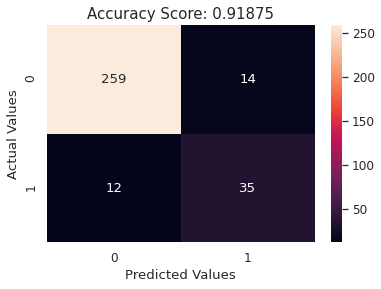

In [104]:
score = round(accuracy_score(y_test, y_pred_rf), 6)
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot = True, fmt = ".0f")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Accuracy Score: {0}".format(score), size = 15)
plt.show()

#### XGBoost

In [105]:
xgb = XGBClassifier()
xgb_model = xgb.fit(x_train , y_train)

[07:01:36] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [106]:
y_pred_xgb = xgb_model.predict(x_test)
accuracy_score(y_test, y_pred_xgb)

0.90625

#### OPTIMIZATION

In [107]:
#xgb_params = {"n_estimators": [100 , 500 , 1000] ,"subsample": [0.6 , 0.8 , 1.0] ,"learning_rate": [0.1 , 0.01 , 0.05]}

#xgb_cv_model = GridSearchCV(xgb , xgb_params , cv = 10 , n_jobs = -1 , verbose = 2)

#xgb_cv_model.fit(x_train, y_train)

In [108]:
#print("Best Parameters: " + str(xgb_cv_model.best_params_))

**Optimized Model**

In [109]:
xgb = XGBClassifier(n_estimators = 1000 , learning_rate = 0.1 , subsample = 1 , max_depth = 4)
opt_xgb =  xgb.fit(x_train,y_train)

[07:01:39] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [110]:
y_pred_xgb = opt_xgb.predict(x_test)
accuracy_score(y_test , y_pred_xgb)

0.9125

In [111]:
print(classification_report(y_test , y_pred_xgb))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       273
           1       0.69      0.74      0.71        47

    accuracy                           0.91       320
   macro avg       0.82      0.84      0.83       320
weighted avg       0.92      0.91      0.91       320



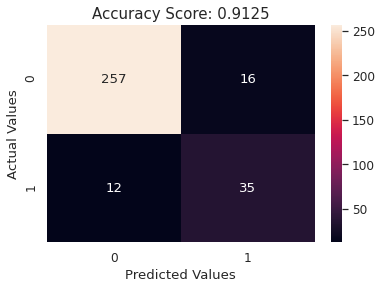

In [112]:
score = round(accuracy_score(y_test, y_pred_xgb), 6)
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot = True, fmt = ".0f")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Accuracy Score: {0}".format(score), size = 15)
plt.show()

#### MODEL SELECT 

----------------------------
KNeighborsClassifier:
Accuracy: 87.8125%
----------------------------
LogisticRegression:
Accuracy: 80.3125%
----------------------------
GaussianNB:
Accuracy: 72.8125%
----------------------------
GradientBoostingClassifier:
Accuracy: 89.6875%
----------------------------
SVC:
Accuracy: 90.9375%
----------------------------
MLPClassifier:
Accuracy: 89.3750%
----------------------------
DecisionTreeClassifier:
Accuracy: 84.3750%
----------------------------
LGBMClassifier:
Accuracy: 90.9375%
----------------------------
RandomForestClassifier:
Accuracy: 91.8750%
----------------------------
XGBClassifier:
Accuracy: 91.2500%


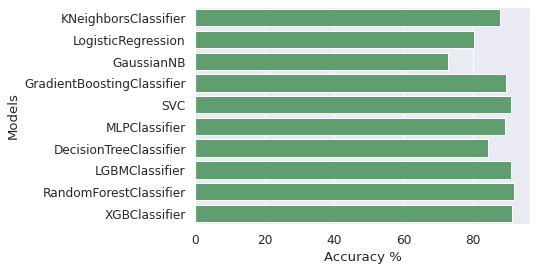

In [113]:
models = [opt_knn , log_model , nb_model , opt_gbm , opt_svc, opt_mlpc , clf_model , opt_lgbm , opt_rf , opt_xgb]
result = []
results = pd.DataFrame(columns= ["Models","Accuracy"])
for x in models:
    names = x.__class__.__name__
    y_pred = x.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("-" * 28)
    print(names + ":" )
    print("Accuracy: {:.4%}".format(accuracy))
for x in models:
    names = x.__class__.__name__
    y_preds = x.predict(x_test)
    accuracy = accuracy_score(y_test, y_preds)    
    result = pd.DataFrame([[names, accuracy * 100]], columns= ["Models","Accuracy"])
    results = results.append(result)
    
sns.barplot(x = "Accuracy", y = "Models", data = results, color = "g")
plt.xlabel("Accuracy %");

#### **CONCLUSION**

Best accuracy **%** **91.875** : **Random Forest Classifier**

Hope you found this notebook useful! 
Please leave in comments in case of any questions, concerns, and feedback! Thank you :)

**Thanks for attention !**